# **Classifier for RUL (Subset FD001: HPC Failure)**

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import StandardScaler
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [23]:
index_names = ['unit_number', 'time_cycles']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names = ['s_{}'.format(i+1) for i in range(0,21)]
col_names = index_names + setting_names + sensor_names

## **1. Load Data:**

In [24]:
dftrain = pd.read_csv(os.path.join("data", "train_FD001.txt"),sep=' ',header=None,index_col=False,names=col_names)
dfvalid = pd.read_csv(os.path.join("data", "test_FD001.txt"),sep=' ',header=None,index_col=False,names=col_names)
y_valid = pd.read_csv(os.path.join("data", "RUL_FD001.txt"),sep=' ',header=None,index_col=False,names=['RUL'])
dfvalid.shape

C:\Users\awfr\AppData\Local\Temp\ipykernel_9612\3499102465.py:1: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  dftrain = pd.read_csv(os.path.join("data", "train_FD001.txt"),sep=' ',header=None,index_col=False,names=col_names)
C:\Users\awfr\AppData\Local\Temp\ipykernel_9612\3499102465.py:2: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  dfvalid = pd.read_csv(os.path.join("data", "test_FD001.txt"),sep=' ',header=None,index_col=False,names=col_names)


(13096, 26)

In [25]:
Sensor_dictionary={}
dict_list=[ "(Fan inlet temperature) (◦R)",
"(LPC outlet temperature) (◦R)",
"(HPC outlet temperature) (◦R)",
"(LPT outlet temperature) (◦R)",
"(Fan inlet Pressure) (psia)",
"(bypass-duct pressure) (psia)",
"(HPC outlet pressure) (psia)",
"(Physical fan speed) (rpm)",
"(Physical core speed) (rpm)",
"(Engine pressure ratio(P50/P2)",
"(HPC outlet Static pressure) (psia)",
"(Ratio of fuel flow to Ps30) (pps/psia)",
"(Corrected fan speed) (rpm)",
"(Corrected core speed) (rpm)",
"(Bypass Ratio) ",
"(Burner fuel-air ratio)",
"(Bleed Enthalpy)",
"(Required fan speed)",
"(Required fan conversion speed)",
"(High-pressure turbines Cool air flow)",
"(Low-pressure turbines Cool air flow)" ]
i=1
for x in dict_list :
    Sensor_dictionary['s_'+str(i)]=x
    i+=1
Sensor_dictionary

{'s_1': '(Fan inlet temperature) (◦R)',
 's_2': '(LPC outlet temperature) (◦R)',
 's_3': '(HPC outlet temperature) (◦R)',
 's_4': '(LPT outlet temperature) (◦R)',
 's_5': '(Fan inlet Pressure) (psia)',
 's_6': '(bypass-duct pressure) (psia)',
 's_7': '(HPC outlet pressure) (psia)',
 's_8': '(Physical fan speed) (rpm)',
 's_9': '(Physical core speed) (rpm)',
 's_10': '(Engine pressure ratio(P50/P2)',
 's_11': '(HPC outlet Static pressure) (psia)',
 's_12': '(Ratio of fuel flow to Ps30) (pps/psia)',
 's_13': '(Corrected fan speed) (rpm)',
 's_14': '(Corrected core speed) (rpm)',
 's_15': '(Bypass Ratio) ',
 's_16': '(Burner fuel-air ratio)',
 's_17': '(Bleed Enthalpy)',
 's_18': '(Required fan speed)',
 's_19': '(Required fan conversion speed)',
 's_20': '(High-pressure turbines Cool air flow)',
 's_21': '(Low-pressure turbines Cool air flow)'}

#### **1.1 Create copy to preprocess:**

In [26]:
train = dftrain.copy()
valid = dfvalid.copy()
train

,unit_number,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


In [27]:
#Cheking the presence of Nan values 
print('Total None values in the train dataset : ',train.isna().sum())

Total None values in the train dataset :  unit_number    0
time_cycles    0
setting_1      0
setting_2      0
setting_3      0
s_1            0
s_2            0
s_3            0
s_4            0
s_5            0
s_6            0
s_7            0
s_8            0
s_9            0
s_10           0
s_11           0
s_12           0
s_13           0
s_14           0
s_15           0
s_16           0
s_17           0
s_18           0
s_19           0
s_20           0
s_21           0
dtype: int64


Text(0.5, 9.444444444444438, 'max time cycle')

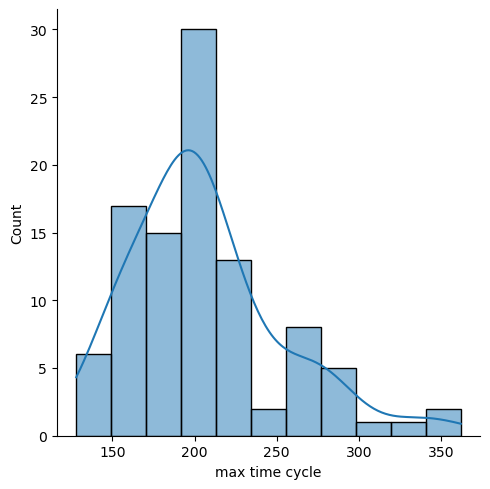

In [28]:
#Distribution of maximum time cycles
max_time_cycles=train[index_names].groupby('unit_number').max()
sns.displot(max_time_cycles['time_cycles'],kde=True,bins="auto",height=5,aspect=1)
plt.xlabel('max time cycle')

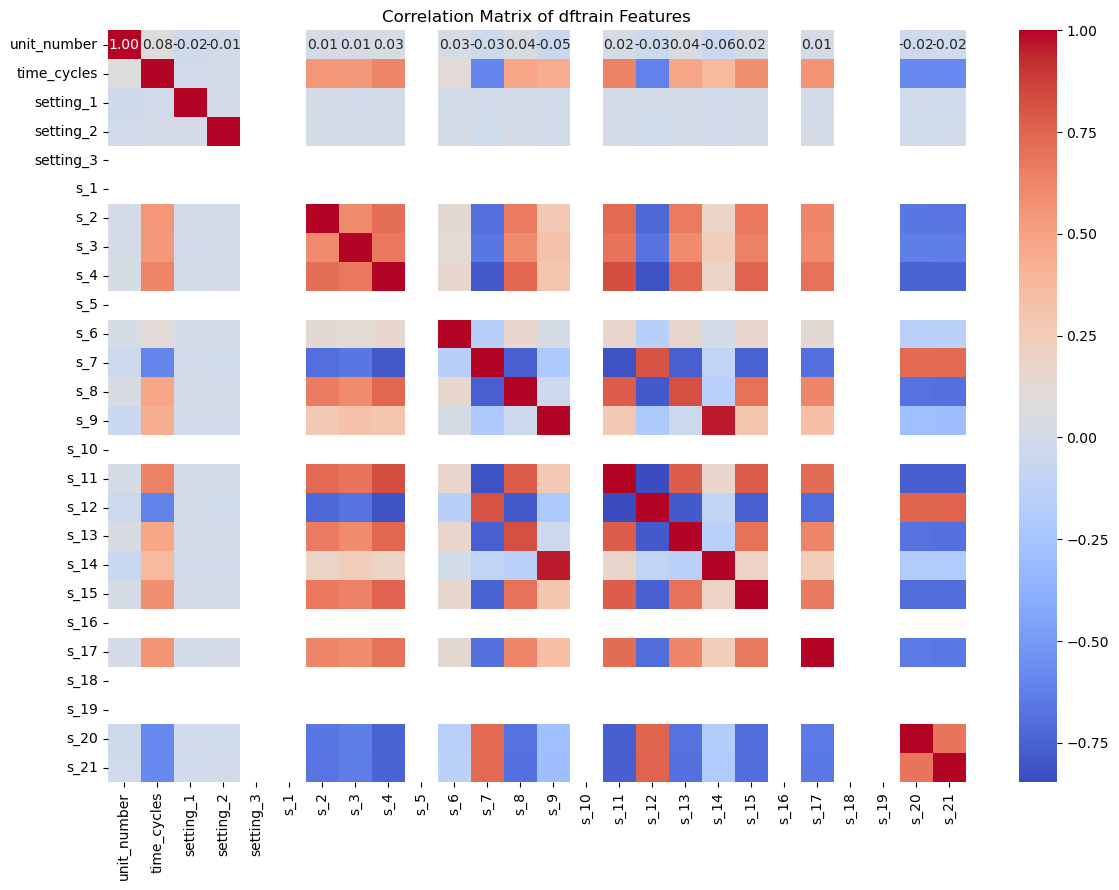

In [29]:
corr_matrix = dftrain.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of dftrain Features')
plt.tight_layout()
plt.show()

#### **1.2 Feature selection helper:**

In [30]:
def plot_all(train, Sensor_dictionary, setting_names):
    # Compute RUL for each unit in train dataset
    train['RUL'] = train.groupby('unit_number')['time_cycles'].transform('max') - train['time_cycles']

    def plot_signal(df, Sensor_dic, signal_name):
        plt.figure(figsize=(13,5))
        for unit in df['unit_number'].unique():
            if unit % 10 == 0:   # plot only a sample of units
                plt.plot('RUL', signal_name, data=df[df['unit_number'] == unit].rolling(10).mean())
        plt.xlim(250, 0)  # reverse x-axis
        plt.xticks(np.arange(0, 300, 25))
        plt.ylabel(Sensor_dic[signal_name])
        plt.xlabel('Remaining Useful Life')
        plt.title(f"Sensor {signal_name}")
        plt.show()

    # Plot all sensor signals
    for i in range(1, 22):
        try:
            plot_signal(train, Sensor_dictionary, 's_' + str(i))
        except Exception:
            pass

    def plot_setting(df, setting_name):
        plt.figure(figsize=(13, 5))
        for unit in df['unit_number'].unique():
            if unit % 10 == 0:  # sample units only
                plt.plot('RUL', setting_name, data=df[df['unit_number'] == unit].rolling(10).mean())
        plt.xlim(df['RUL'].max(), 0)
        plt.xticks(np.arange(0, df['RUL'].max()+1, 25))
        plt.xlabel('Remaining Useful Life')
        plt.ylabel(setting_name)
        plt.title(f"Plot for {setting_name}")
        plt.show()

    # Plot all settings
    for s in setting_names:
        try:
            plot_setting(train, s)
        except Exception as e:
            print(f"Error plotting {s}: {e}")

# plot_all(train, Sensor_dictionary, setting_names)

#### **1.3 Deciding which features to drop:**

In [31]:
# To see standard deviation of each column to identify the constant features, or look at min = max,

print(train.loc[:].describe().transpose().loc[lambda x: x['min'] == x['max']].index.tolist())
print(train.loc[:].describe().transpose().loc[lambda x: x['std'] == 0].index.tolist())

['setting_3', 's_1', 's_5', 's_10', 's_16', 's_18', 's_19']
['setting_3', 's_18', 's_19']


In [32]:
# Sensor 6 is dropped as well
# setting 1 and 2 are just too noisy
# Sensor 14 is too highly correlated and is also dropped
drop_list = ['setting_1', 'setting_2', 'setting_3', 's_1', 's_5', 's_6', 's_10', 's_14', 's_16', 's_18', 's_19'] + index_names

#### **1.4 Creating label for classification:**

In [33]:
# Compute RUL for each unit in train dataset
train['RUL'] = train.groupby('unit_number')['time_cycles'].transform('max') - train['time_cycles']

# Create labels based on RUL (<30 -> unfit, >=30 -> fit)
train['label'] = train['RUL'].apply(lambda x: 'unfit' if x < 30 else 'fit')

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Split features and target label, ensuring that RUL and label are not part of the features.
# Adjust drop_list as needed, here we drop RUL and label from the features.
X = train.drop(columns=drop_list + ['RUL', 'label']).copy() 
y = train['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

# Initialize the scaler
scaler = MinMaxScaler()

# Scale only the feature columns
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

# For validation, extract features from valid without RUL (or label if created) - here we assume valid does not have label
X_valid = valid.groupby('unit_number').last().reset_index().drop(columns=drop_list)
X_valid_s = scaler.transform(X_valid)

In [35]:
print("X_train_s shape:", X_train_s.shape)
print("X_test_s shape:", X_test_s.shape)

print("Training label distribution:")
print(y_train.value_counts())

print("\nTest label distribution:")
print(y_test.value_counts())

X_train_s shape: (19599, 13)
X_test_s shape: (1032, 13)
Training label distribution:
label
fit      16729
unfit     2870
Name: count, dtype: int64

Test label distribution:
label
fit      902
unfit    130
Name: count, dtype: int64


<Figure size 2400x2000 with 0 Axes>

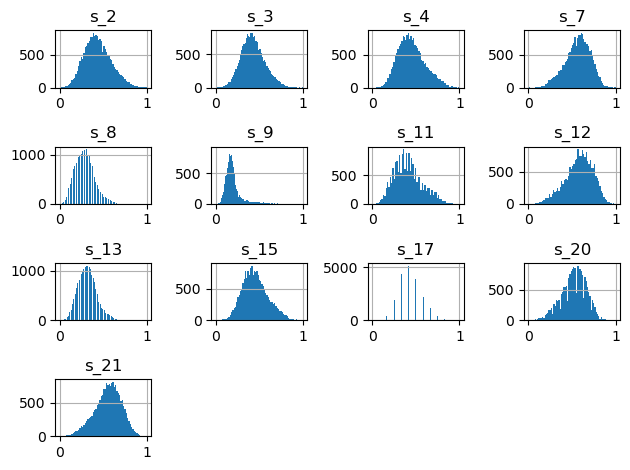

In [36]:
plt.figure(figsize=(24,20))
pd.DataFrame(X_train_s, columns=X_train.columns).hist(bins="auto")
plt.tight_layout()
plt.show()

### **2. Implementing the SVC:**

In [ ]:
# %pip install scikit-optimize
from skopt import BayesSearchCV
from skopt.space import Real, Categorical
from sklearn.svm import SVC

# Define the hyperparameter space.
param_space = {
    'C': Real(1e-2, 1e2, prior='log-uniform'),
    'kernel': Categorical(['linear', 'rbf', 'poly', 'sigmoid']),
    'gamma': Categorical([1e-3, 1e-2, 1e-1, 1, 10])
}

svc = SVC(class_weight='balanced', random_state=42)

# Setup Bayesian Optimization with cross-validation.
bayes_cv = BayesSearchCV(
    estimator=svc,
    search_spaces=param_space,
    n_iter=15,        # number of parameter settings sampled
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

bayes_cv.fit(X_train_s, y_train)
print("Best score:", bayes_cv.best_score_)
print("Best parameters:", bayes_cv.best_params_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

c:\Users\awfr\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [100.0, 0.1, 'poly'] before, using random point [0.3010210811472045, 0.001, 'poly']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

c:\Users\awfr\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [100.0, 0.1, 'sigmoid'] before, using random point [0.09563171483881734, 10, 'sigmoid']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


c:\Users\awfr\anaconda3\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [100.0, 0.1, 'sigmoid'] before, using random point [1.3553694846367335, 10, 'rbf']
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [ ]:
best_model = bayes_cv.best_estimator_

# Make predictions on the test split
y_pred_test = best_model.predict(X_test_s)

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
# Evaluate the classifier on the test set
print("Test Classification Report:")
print(classification_report(y_test, y_pred_test))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))

# Compute the confusion matrix with specific label order
cm = confusion_matrix(y_test, y_pred_test, labels=['fit', 'unfit'])

plt.figure(figsize=(6, 5))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(['fit', 'unfit']))
plt.xticks(tick_marks, ['fit', 'unfit'])
plt.yticks(tick_marks, ['fit', 'unfit'])
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


# **Results:**
#### **Results for labeling at RUL < 30; split = 0.05:**

Test Classification Report:
>              precision    recall  f1-score   support

>         fit       0.98      0.97      0.97       902
>       unfit       0.79      0.87      0.83       130

>    accuracy                           0.95      1032
   
>   macro avg       0.89      0.92      0.90      1032<br>
>weighted avg       0.96      0.95      0.96      1032

Test Accuracy: 0.9544573643410853<br>
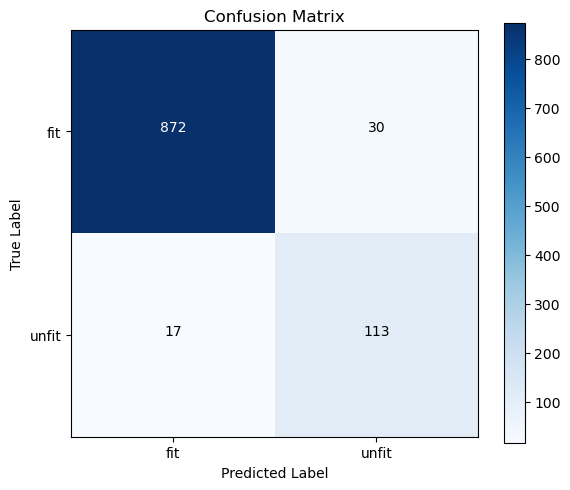

#### **Results for labeling at RUL < 100; split = 0.05:**
Test Classification Report:
>              precision    recall  f1-score   support

>         fit       0.79      0.93      0.86       555
>       unfit       0.90      0.72      0.80       477

>    accuracy                           0.83      1032
>   macro avg       0.85      0.82      0.83      1032<br>
>weighted avg       0.84      0.83      0.83      1032

Test Accuracy: 0.8313953488372093<br>
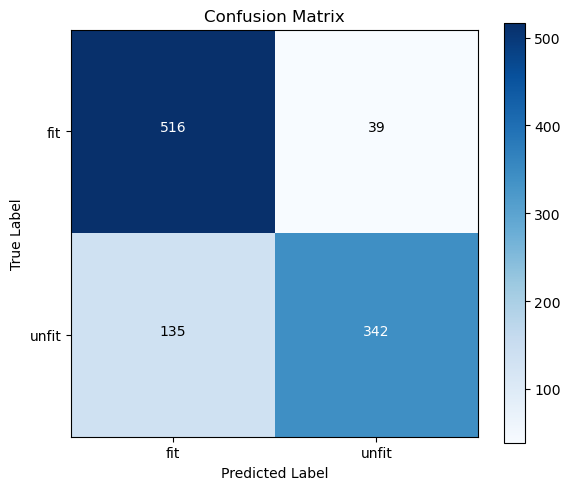

#### **Results for labeling at RUL < 30; split = 0.2:**
Test Classification Report:
>              precision    recall  f1-score   support

>         fit       0.98      0.96      0.97      3559
>       unfit       0.77      0.88      0.82       568

>    accuracy                           0.95      4127
>   macro avg       0.87      0.92      0.90      4127<br>
>weighted avg       0.95      0.95      0.95      4127

Test Accuracy: 0.9471771262418222<br>
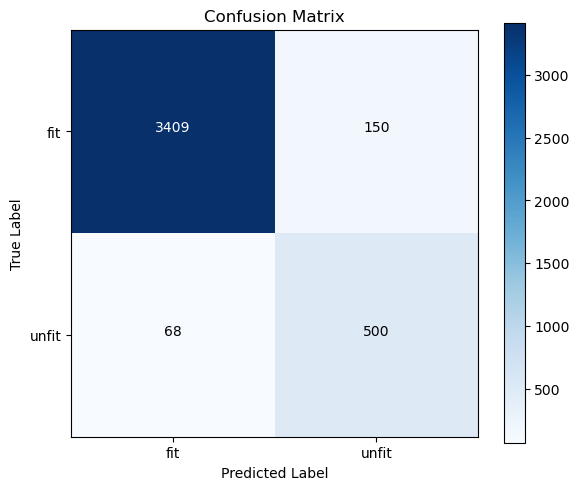

#### **Results for labeling at RUL < 100; split = 0.2:**
Test Classification Report:
>              precision    recall  f1-score   support

>         fit       0.80      0.92      0.85      2189
>       unfit       0.89      0.73      0.80      1938

>    accuracy                           0.83      4127
>   macro avg       0.84      0.83      0.83      4127<br>
>weighted avg       0.84      0.83      0.83      4127

Test Accuracy: 0.8332929488732735<br>
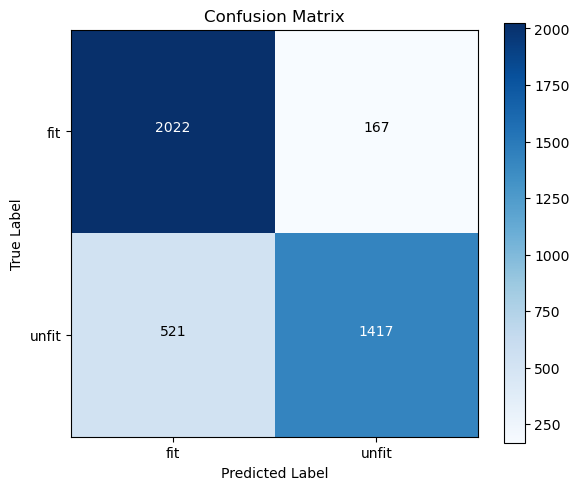